In [65]:
%matplotlib inline
import pandas as pd

In [66]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [67]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Beachcomber,1954
1,You Were Never Here,2017
2,Hei shou jin gang,1974
3,Campioana,1990
4,Doroppu,2009


In [68]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [26]:
cast.groupby([cast.year, cast.type]).size()

year  type   
1894  actor           2
      actress         1
1900  actor           2
1905  actor           1
1906  actor          14
      actress         3
1907  actor           5
1908  actor          29
      actress        13
1909  actor           3
1910  actor          44
      actress        24
1911  actor         123
      actress        64
1912  actor         244
      actress       151
1913  actor         657
      actress       345
1914  actor        2245
      actress      1156
1915  actor        3473
      actress      2037
1916  actor        4938
      actress      2878
1917  actor        5286
      actress      3103
1918  actor        4996
      actress      2842
1919  actor        5109
      actress      2907
                  ...  
2008  actress     35387
2009  actor       76218
      actress     42005
2010  actor       74427
      actress     39951
2011  actor       81832
      actress     45195
2012  actor       87563
      actress     47423
2013  actor       91375
  

In [27]:
nofActorsYear = cast[cast.type == 'actor'].groupby(cast.year).size()
nofActorsYear.sort_index().head()


year
1894     2
1900     2
1905     1
1906    14
1907     5
dtype: int64

In [28]:
nofActressYear = cast[cast.type == 'actress'].groupby(cast.year).size()
nofActressYear.sort_index().head()

year
1894     1
1906     3
1908    13
1910    24
1911    64
dtype: int64

In [29]:
(nofActorsYear - nofActressYear).fillna(0).head()

year
1894     1.0
1900     0.0
1905     0.0
1906    11.0
1907     0.0
dtype: float64

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [30]:
c = cast[(cast.character == "Batman") | (cast.character == "Superman")]

In [31]:
g = c.groupby([c.year, c.character]).size()
g
u = g.unstack('character')
u.fillna(0)

s = u.Batman - u.Superman
s[s > 0]

year
2008    1.0
2009    2.0
2010    1.0
2011    1.0
2012    1.0
2013    4.0
2014    4.0
2015    3.0
2016    8.0
2018    1.0
dtype: float64

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [32]:
g = cast.groupby([cast.year,cast.type]).size()
#g

In [33]:
u = g.unstack()
#u

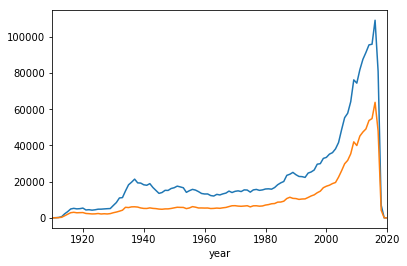

In [41]:
u.actor.plot(xlim=[1910,2020])
u.actress.plot(xlim=[1910,2020])

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

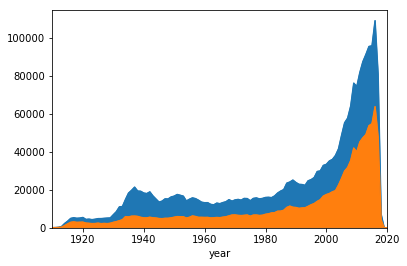

In [40]:
u.actor.plot(kind = 'area', xlim=[1910,2020])
u.actress.plot(kind = 'area', xlim=[1910,2020])

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

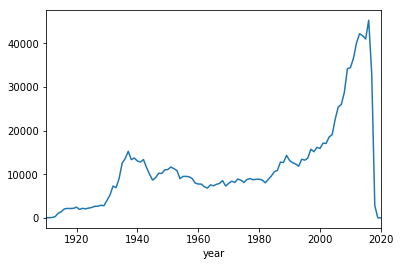

In [39]:
(u.actor - u.actress).plot(xlim=[1910,2020])

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

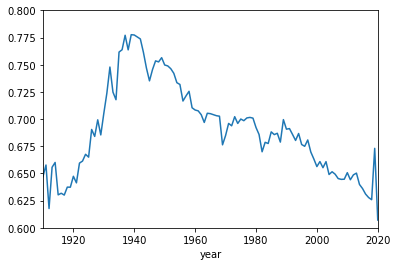

In [91]:
g = cast.groupby([cast.year,cast.type]).size()
u = g.unstack()
u.fillna(0)
f = u.actor / (u.actor + u.actress)
f.plot(xlim = [1910,2020], ylim=[0.6,0.8])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [12]:
actor_roles = cast[(cast.type == 'actor') & (cast.n == 2)]
actor_roles_year = actor_roles.groupby(actor_roles.year).size()
actor_roles_year.head()

year
1906     2
1907     1
1908     2
1910     2
1911    13
dtype: int64

In [13]:
actress_roles = cast[(cast.type == 'actress') & (cast.n == 2)]
actress_roles_year = actress_roles.groupby(actress_roles.year).size()
actress_roles_year.head()

year
1906     1
1910     2
1911     5
1912    15
1913    50
dtype: int64

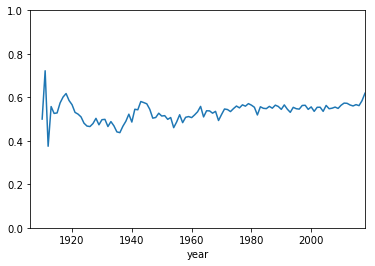

In [20]:
(actor_roles_year / (actor_roles_year + actress_roles_year)).plot(ylim=[0,1])

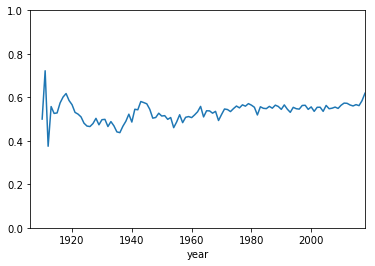

In [19]:
#Other way to solve the ^problem using unstack
c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

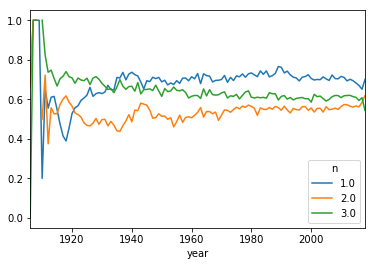

In [75]:
c = cast[cast.n <=3]
g = c.groupby([c.year, c.type, c.n]).size()
u = g.unstack('type')
u = u.fillna(0)
r = u.actor / (u.actor + u.actress)
u = r.unstack('n')
u.plot()